<font color = blue size=5><b> 3. Named-entity recognition</font>

<font color = green size=3><b> 3.1 NER with NLTK</font>
- Named Entity recognition is a NLP task used to identify important named entities in the text
 - people, place, organization
 - dates, states, works of art
 - ... and many more!
- NER can be used alongside topic identifiation, or on its own!

**NLTK and the Stanford CoreNLP library**
- integrated into python via nltk
- java based
- you can also used it on its own without nltk
- great support for NER as well as coreference and depenency trees!

**TASKS: NER with NLTK**
- Tokenize article into sentences.
- Tokenize each sentence in sentences into words using a list comprehension.
- Inside a list comprehension, tag each tokenized sentence into parts of speech using nltk.pos_tag().
- Chunk each tagged sentence into named-entity chunks using nltk.ne_chunk_sents(). Along with pos_sentences, specify the additional keyword argument binary=True.
- Loop over each sentence and each chunk, and test whether it is a named-entity chunk by testing if it has the attribute label, and if the chunk.label() is equal to "NE". If so, print that chunk.

**HINT**
- Use nltk.sent_tokenize() to tokenize article into sentences.
- Use nltk.word_tokenize() with sent as the argument as the output expression of your list comprehension to tokenize each sentence into words.
- Similar to how you created token_sentences, use nltk.pos_tag() to create pos_sentences.
- To chunk each tagged sentence into named-entity chunks, use the nltk.ne_chunk_sents() function with two arguments: the parts of speech tagged sentences, as well as binary=True.
- Inside the nested for loop, check whether chunk.label() equals "NE". If it does, print that chunk.

In [1]:
article = '\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'

In [2]:
import nltk

# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)
print(len(sentences))
sentences[0]

20


'\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character.'

In [3]:
# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]
print(len(token_sentences))
token_sentences[0][0:10]

20


['\ufeffThe',
 'taxi-hailing',
 'company',
 'Uber',
 'brings',
 'into',
 'very',
 'sharp',
 'focus',
 'the']

In [4]:
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]
print(len(pos_sentences))
pos_sentences[0][0:10]

20


[('\ufeffThe', 'JJ'),
 ('taxi-hailing', 'JJ'),
 ('company', 'NN'),
 ('Uber', 'NNP'),
 ('brings', 'VBZ'),
 ('into', 'IN'),
 ('very', 'RB'),
 ('sharp', 'JJ'),
 ('focus', 'VB'),
 ('the', 'DT')]

In [5]:
# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)
chunked_sentences

<generator object ParserI.parse_sents.<locals>.<genexpr> at 0x0000019D58E222B0>

In [6]:
# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        #use  python function "hasattr()" to check if an object has the attribute 'label'
        #I beleive only chunks classified as 'NE' have the attribute 'label'
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)  

print(chunked_sentences)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)
<generator object ParserI.parse_sents.<locals>.<genexpr> at 0x0000019D58E222B0>


**TASK: Charting practice**

In this exercise, you'll use some extracted named entities and their groupings from a series of newspaper articles to chart the diversity of named entity types in the articles.

You'll use a defaultdict called ner_categories, with keys representing every named entity group type, and values to count the number of each different named entity type. You have a chunked sentence list called chunked_sentences similar to the last exercise, but this time with non-binary category names.

You can use hasattr() to determine if each chunk has a 'label' and then simply use the chunk's .label() method as the dictionary key.

**INSTRUCTIONS**
- Create a defaultdict called ner_categories, with the default type set to int.
- Fill up the dictionary with values for each of the keys. Remember, the keys will represent the label().
    - In the outer for loop, iterate over chunked_sentences, using sent as your iterator variable.
    - In the inner for loop, iterate over sent. If the condition is true, increment the value of each key by 1.
- For the pie chart labels, create a list called labels from the keys of ner_categories, which can be accessed using .keys().
- Use a list comprehension to create a list called values, using the .get() method on ner_categories to compute the values of each label l.
- Use plt.pie() to create a pie chart for each of the NER categories. Along with values and labels=labels, pass the extra keyword arguments autopct='%1.1f%%' and startangle=140 to add percentages to the chart and rotate the initial start angle.
- Display your pie chart. Was the distribution what you expected?

**HINT**
- Use defaultdict(int) to create ner_categories.
- If the condition inside the nested for loop is true, increment ner_categories[chunk.label()].
- Use the .keys() method on ner_categories to access its keys.
- Use the .get() method on ner_categories with l as the argument to compute the values.
- Use plt.pie() with the arguments specified in the instructions to create the pie chart. Then, use plt.show() to display it.

In [7]:
#manually import some (about one tenth) of the trees
#the whole dataset is too big!
from nltk.tree import *
chunked_sentences = [Tree('S', [('\ufeffImage', 'NN'), ('copyright', 'NN'), Tree('ORGANIZATION', [('EPA', 'NNP'), ('Image', 'NNP')]), ('caption', 'NN'), ('Uber', 'NNP'), ('has', 'VBZ'), ('been', 'VBN'), ('criticised', 'VBN'), ('many', 'JJ'), ('times', 'NNS'), ('over', 'IN'), ('the', 'DT'), ('way', 'NN'), ('it', 'PRP'), ('runs', 'VBZ'), ('its', 'PRP$'), ('business', 'NN'), ('Ride-sharing', 'JJ'), ('firm', 'NN'), ('Uber', 'NNP'), ('is', 'VBZ'), ('facing', 'VBG'), ('a', 'DT'), ('criminal', 'JJ'), ('investigation', 'NN'), ('by', 'IN'), ('the', 'DT'), Tree('GPE', [('US', 'JJ')]), ('government', 'NN'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('scrutiny', 'NN'), ('has', 'VBZ'), ('started', 'VBN'), ('because', 'IN'), ('the', 'DT'), ('firm', 'NN'), ('is', 'VBZ'), ('accused', 'VBN'), ('of', 'IN'), ('using', 'VBG'), ('``', '``'), ('secret', 'JJ'), ("''", "''"), ('software', 'NN'), ('that', 'WDT'), ('let', 'VBD'), ('it', 'PRP'), ('operate', 'VB'), ('in', 'IN'), ('regions', 'NNS'), ('where', 'WRB'), ('it', 'PRP'), ('was', 'VBD'), ('banned', 'VBN'), ('or', 'CC'), ('restricted', 'VBN'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('software', 'NN'), (',', ','), ('called', 'VBN'), ('``', '``'), ('greyball', 'NN'), ("''", "''"), (',', ','), ('helped', 'VBD'), ('it', 'PRP'), ('identify', 'VB'), ('officials', 'NNS'), ('seeking', 'VBG'), ('to', 'TO'), ('stop', 'VB'), ('the', 'DT'), ('service', 'NN'), ('running', 'VBG'), ('.', '.')]),
 Tree('S', [('A', 'DT'), ('spokesman', 'NN'), ('for', 'IN'), Tree('PERSON', [('Uber', 'NNP')]), ('declined', 'VBD'), ('to', 'TO'), ('comment', 'VB'), ('on', 'IN'), ('the', 'DT'), ('investigation', 'NN'), (',', ','), ('reported', 'VBD'), ('the', 'DT'), Tree('ORGANIZATION', [('Reuters', 'NNPS')]), ('news', 'NN'), ('agency', 'NN'), ('.', '.')]),
 Tree('S', [('It', 'PRP'), ('is', 'VBZ'), ('claimed', 'VBN'), ('greyball', 'NN'), ('was', 'VBD'), ('used', 'VBN'), ('in', 'IN'), ('several', 'JJ'), ('areas', 'NNS'), (',', ','), ('including', 'VBG'), Tree('GPE', [('Portland', 'NNP')]), (',', ','), Tree('GPE', [('Oregon', 'NNP')]), (',', ','), ('where', 'WRB'), ('the', 'DT'), ('ride', 'NN'), ('service', 'NN'), ('was', 'VBD'), ('still', 'RB'), ('seeking', 'VBG'), ('official', 'JJ'), ('approval', 'NN'), ('to', 'TO'), ('operate', 'VB'), ('.', '.')]),
 Tree('S', [('Bookings', 'NNS'), ('blocked', 'VBN'), ('In', 'IN'), ('those', 'DT'), ('areas', 'NNS'), (',', ','), ('transport', 'NN'), ('regulation', 'NN'), ('officials', 'NNS'), ('posed', 'VBD'), ('as', 'IN'), ('passengers', 'NNS'), ('in', 'IN'), ('a', 'DT'), ('bid', 'NN'), ('to', 'TO'), ('prove', 'VB'), ('that', 'IN'), ('the', 'DT'), ('company', 'NN'), ('was', 'VBD'), ('operating', 'VBG'), ('illegally', 'RB'), ('.', '.')]),
 Tree('S', [Tree('GPE', [('Greyball', 'NNP')]), ('worked', 'VBD'), ('out', 'RP'), ('who', 'WP'), ('the', 'DT'), ('officials', 'NNS'), ('were', 'VBD'), ('and', 'CC'), ('blocked', 'VBD'), ('them', 'PRP'), ('from', 'IN'), ('booking', 'VBG'), ('rides', 'NNS'), ('with', 'IN'), ('the', 'DT'), ('company', 'NN'), ("'s", 'POS'), ('drivers', 'NNS'), ('.', '.')]),
 Tree('S', [('In', 'IN'), ('a', 'DT'), ('letter', 'NN'), ('sent', 'VBN'), ('last', 'JJ'), ('week', 'NN'), ('to', 'TO'), ('transport', 'VB'), ('regulators', 'NNS'), ('in', 'IN'), Tree('GPE', [('Portland', 'NNP')]), (',', ','), Tree('PERSON', [('Uber', 'NNP')]), ('said', 'VBD'), ('it', 'PRP'), ('used', 'VBD'), ('the', 'DT'), ('greyball', 'NN'), ('software', 'NN'), ('``', '``'), ('exceedingly', 'RB'), ('sparingly', 'RB'), ("''", "''"), ('in', 'IN'), ('the', 'DT'), ('city', 'NN'), ('and', 'CC'), ('had', 'VBD'), ('not', 'RB'), ('used', 'VBN'), ('it', 'PRP'), ('since', 'IN'), ('April', 'NNP'), ('2015', 'CD'), ('when', 'WRB'), ('it', 'PRP'), ('was', 'VBD'), ('granted', 'VBN'), ('permission', 'NN'), ('to', 'TO'), ('operate', 'VB'), ('.', '.')]),
 Tree('S', [('Uber', 'NNP'), ("'s", 'POS'), ('use', 'NN'), ('of', 'IN'), ('the', 'DT'), ('software', 'NN'), ('was', 'VBD'), ('revealed', 'VBN'), ('by', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP'), ('Times', 'NNP')]), ('earlier', 'RBR'), ('this', 'DT'), ('year', 'NN'), ('.', '.')]),
 Tree('S', [('Uber', 'NNP'), ('defended', 'VBD'), ('its', 'PRP$'), ('use', 'NN'), ('in', 'IN'), ('a', 'DT'), ('blog', 'NN'), ('saying', 'VBG'), ('the', 'DT'), ('software', 'NN'), ('helped', 'VBD'), ('it', 'PRP'), ('work', 'VB'), ('out', 'RP'), ('if', 'IN'), ('a', 'DT'), ('ride', 'NN'), ('request', 'NN'), ('was', 'VBD'), ('legitimate', 'JJ'), ('.', '.')]),
 Tree('S', [('It', 'PRP'), ('helped', 'VBD'), ('Uber', 'NNP'), ('limit', 'NN'), ('fraud', 'NN'), ('and', 'CC'), ('protect', 'NN'), ('drivers', 'NNS'), ('from', 'IN'), ('harm', 'NN'), (',', ','), ('it', 'PRP'), ('added', 'VBD'), ('.', '.')]),
 Tree('S', [('It', 'PRP'), ('is', 'VBZ'), ('not', 'RB'), ('clear', 'JJ'), ('what', 'WP'), ('sanctions', 'VBZ'), ('Uber', 'NNP'), ('will', 'MD'), ('face', 'VB'), ('if', 'IN'), ('the', 'DT'), ('investigation', 'NN'), ('finds', 'VBZ'), ('that', 'IN'), ('it', 'PRP'), ('did', 'VBD'), ('act', 'VB'), ('illegally', 'RB'), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('criminal', 'JJ'), ('inquiry', 'NN'), ('comes', 'VBZ'), ('at', 'IN'), ('a', 'DT'), ('difficult', 'JJ'), ('time', 'NN'), ('for', 'IN'), ('Uber', 'NNP'), ('which', 'WDT'), ('has', 'VBZ'), ('faced', 'VBN'), ('criticism', 'NN'), ('on', 'IN'), ('many', 'JJ'), ('fronts', 'NNS'), ('.', '.')]),
 Tree('S', [('It', 'PRP'), ('is', 'VBZ'), ('currently', 'RB'), ('fighting', 'VBG'), ('a', 'DT'), ('lawsuit', 'NN'), ('from', 'IN'), ('Google-backed', 'JJ'), ('self-driving', 'JJ'), ('car', 'NN'), ('firm', 'NN'), ('Waymo.Despite', 'NNP'), ('all', 'PDT'), ('the', 'DT'), ('current', 'JJ'), ('hype', 'NN'), ('about', 'IN'), ('the', 'DT'), ('rise', 'NN'), ('of', 'IN'), ('voice-assisted', 'JJ'), ('devices', 'NNS'), ('using', 'VBG'), Tree('PERSON', [('Alexa', 'NNP')]), ('and', 'CC'), Tree('PERSON', [('Siri', 'NNP')]), (',', ','), ('linguistics', 'VBZ'), ('researcher', 'JJR'), Tree('PERSON', [('Rachael', 'NNP'), ('Tatman', 'NNP')]), ('found', 'VBD'), ('people', 'NNS'), ('complaining', 'VBG'), ('on', 'IN'), ('social', 'JJ'), ('media', 'NNS'), ('that', 'IN'), ('the', 'DT'), ('technology', 'NN'), ('still', 'RB'), ('doesn’t', 'JJ'), ('understand', 'VBP'), ('them', 'PRP'), ('.', '.')]),
 Tree('S', [('That’s', 'NNP'), ('especially', 'RB'), ('true', 'JJ'), ('with', 'IN'), ('regional', 'JJ'), ('accents', 'NNS'), ('of', 'IN'), ('people', 'NNS'), ('who', 'WP'), ('live', 'VBP'), ('in', 'IN'), ('the', 'DT'), Tree('LOCATION', [('South', 'NNP')]), ('or', 'CC'), ('are', 'VBP'), ('from', 'IN'), ('countries', 'NNS'), ('like', 'IN'), Tree('ORGANIZATION', [('New', 'NNP'), ('Zealand', 'NNP')]), (',', ','), Tree('PERSON', [('Tatman', 'NNP')]), ('said', 'VBD'), ('last', 'JJ'), ('week', 'NN'), ('during', 'IN'), ('a', 'DT'), ('conference', 'NN'), ('in', 'IN'), Tree('GPE', [('San', 'NNP'), ('Francisco', 'NNP')]), ('.', '.')]),
 Tree('S', [('“So', 'NN'), ('this', 'DT'), ('is', 'VBZ'), ('the', 'DT'), ('whatever', 'NN'), ('the', 'DT'), ('opposite', 'NN'), ('of', 'IN'), ('delight', 'NN'), ('is', 'VBZ'), ('as', 'IN'), ('a', 'DT'), ('user', 'NN'), ('experience', 'NN'), (',', ','), ('”', 'NNP'), ('she', 'PRP'), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [('“People', 'NNS'), ('are', 'VBP'), ('so', 'RB'), ('upset', 'JJ'), ('that', 'IN'), ('they’re', 'VBZ'), ('going', 'VBG'), ('on', 'IN'), Tree('PERSON', [('Twitter', 'NNP')]), ('and', 'CC'), ('yelling', 'VBG'), ('about', 'IN'), ('it.”', 'JJ'), Tree('PERSON', [('Tatman', 'NNP')]), (',', ','), ('a', 'DT'), ('doctoral', 'JJ'), ('candidate', 'NN'), ('with', 'IN'), ('the', 'DT'), Tree('ORGANIZATION', [('University', 'NNP')]), ('of', 'IN'), ('Washington’s', 'NNP'), ('linguistics', 'NNS'), ('department', 'NN'), (',', ','), ('was', 'VBD'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('speakers', 'NNS'), ('at', 'IN'), ('a', 'DT'), ('two-day', 'JJ'), Tree('PERSON', [('Virtual', 'NNP'), ('Assistant', 'NNP'), ('Summit', 'NNP')]), (',', ','), ('which', 'WDT'), ('wrapped', 'VBD'), ('up', 'RP'), ('Friday', 'NNP'), ('at', 'IN'), ('the', 'DT'), Tree('FACILITY', [('Park', 'NNP'), ('Central', 'NNP'), ('Hotel', 'NNP')]), ('.', '.')]),
 Tree('S', [('The', 'DT'), ('conference', 'NN'), (',', ','), ('and', 'CC'), ('an', 'DT'), ('adjacent', 'JJ'), ('Deep', 'NNP'), ('Learning', 'NNP'), ('Summit', 'NNP'), (',', ','), ('drew', 'VBD'), ('about', 'IN'), ('600', 'CD'), ('people', 'NNS'), ('representing', 'VBG'), ('companies', 'NNS'), ('that', 'WDT'), ('are', 'VBP'), ('working', 'VBG'), ('on', 'IN'), ('advancing', 'VBG'), ('artificial', 'JJ'), ('intelligence', 'NN'), (',', ','), ('machine', 'NN'), ('learning', 'NN'), ('and', 'CC'), ('robotics', 'NNS'), ('.', '.')]),
 Tree('S', [('Lots', 'NNS'), ('of', 'IN'), ('people', 'NNS'), ('are', 'VBP'), ('already', 'RB'), ('using', 'VBG'), ('those', 'DT'), ('technologies', 'NNS'), ('in', 'IN'), ('programs', 'NNS'), ('like', 'IN'), ('Apple’s', 'NNP'), ('Siri', 'NNP'), ('.', '.')]),
 Tree('S', [('They', 'PRP'), ('are', 'VBP'), ('moving', 'VBG'), ('beyond', 'IN'), ('mobile', 'JJ'), ('phones', 'NNS'), ('and', 'CC'), ('into', 'IN'), ('smart-home', 'JJ'), ('devices', 'NNS'), ('like', 'IN'), Tree('ORGANIZATION', [('Amazon’s', 'NNP'), ('Echo', 'NNP')]), ('.', '.')]),
 Tree('S', [('Other', 'JJ'), ('fast-changing', 'JJ'), ('technologies', 'NNS'), ('include', 'VBP'), ('artificial', 'JJ'), ('intelligence', 'NN'), ('and', 'CC'), ('consumer', 'NN'), ('robotics', 'NNS'), (',', ','), ('especially', 'RB'), ('with', 'IN'), ('self-driving', 'JJ'), ('cars', 'NNS'), ('on', 'IN'), ('the', 'DT'), ('horizon', 'NN'), ('.', '.')]),
 Tree('S', [('But', 'CC'), ('there’s', 'NN'), ('still', 'RB'), ('work', 'VB'), ('to', 'TO'), ('be', 'VB'), ('done', 'VBN'), ('in', 'IN'), ('each', 'DT'), ('of', 'IN'), ('those', 'DT'), ('areas', 'NNS'), (',', ','), ('speakers', 'NNS'), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [('For', 'IN'), ('example', 'NN'), (',', ','), ('artificial', 'JJ'), ('speech', 'NN'), ('recognition', 'NN'), ('technologies', 'NNS'), ('still', 'RB'), ('fall', 'VBP'), ('short', 'JJ'), ('of', 'IN'), ('the', 'DT'), ('way', 'NN'), ('humans', 'NNS'), ('can', 'MD'), ('quickly', 'RB'), ('learn', 'VB'), ('and', 'CC'), ('discern', 'VB'), ('speech', 'NN'), ('patterns', 'NNS'), ('from', 'IN'), ('each', 'DT'), ('other', 'JJ'), ('in', 'IN'), ('“as', 'JJ'), ('little', 'JJ'), ('as', 'IN'), ('two', 'CD'), ('sentences', 'NNS'), (',', ','), ('”', 'NNP'), Tree('PERSON', [('Tatman', 'NNP')]), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [('But', 'CC'), ('that’s', 'NN'), ('because', 'IN'), ('humans', 'NNS'), ('take', 'VBP'), ('into', 'IN'), ('account', 'NN'), ('other', 'JJ'), ('factors', 'NNS'), (',', ','), ('such', 'JJ'), ('as', 'IN'), ('the', 'DT'), ('gender', 'NN'), ('of', 'IN'), ('person', 'NN'), ('talking', 'VBG'), ('or', 'CC'), ('whether', 'IN'), ('they’ve', 'JJ'), ('previously', 'RB'), ('met', 'VBN'), ('someone', 'NN'), ('from', 'IN'), ('the', 'DT'), ('the', 'DT'), ('same', 'JJ'), ('region', 'NN'), (',', ','), ('she', 'PRP'), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [Tree('PERSON', [('Tatman', 'NNP')]), ('examined', 'VBD'), ('YouTube’s', 'NNP'), ('automatic', 'JJ'), ('captioning', 'NN'), ('program', 'NN'), (',', ','), ('which', 'WDT'), ('can', 'MD'), ('translate', 'VB'), ('spoken', 'JJ'), ('words', 'NNS'), ('into', 'IN'), ('text', 'NN'), ('in', 'IN'), ('several', 'JJ'), ('languages', 'NNS'), ('.', '.')]),
 Tree('S', [('She', 'PRP'), ('found', 'VBD'), ('that', 'IN'), ('more', 'RBR'), ('errors', 'NNS'), ('showed', 'VBD'), ('up', 'RP'), ('in', 'IN'), ('translations', 'NNS'), ('from', 'IN'), ('speakers', 'NNS'), ('who', 'WP'), ('had', 'VBD'), ('a', 'DT'), Tree('GPE', [('Southern', 'JJ')]), ('accent', 'NN'), ('than', 'IN'), ('from', 'IN'), ('people', 'NNS'), ('who', 'WP'), ('lived', 'VBD'), ('in', 'IN'), Tree('GPE', [('California', 'NNP')]), ('.', '.')]),
 Tree('S', [('“The', 'NN'), Tree('GPE', [('South', 'NNP')]), ('is', 'VBZ'), ('the', 'DT'), ('largest', 'JJS'), ('demographic', 'JJ'), ('region', 'NN'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('United', 'NNP'), ('States', 'NNPS')]), (',', ','), ('”', 'NNP'), ('she', 'PRP'), ('said', 'VBD'), ('.', '.')]),
 Tree('S', [('“If', 'NN'), ('you’re', 'NN'), ('using', 'VBG'), ('a', 'DT'), ('voice-based', 'JJ'), ('virtual', 'JJ'), ('assistant', 'NN'), ('and', 'CC'), ('you', 'PRP'), ('can’t', 'VBP'), ('deal', 'VB'), ('with', 'IN'), Tree('GPE', [('Southern', 'NNP')]), ('speech', 'NN'), (',', ','), ('you’re', 'RB'), ('going', 'VBG'), ('to', 'TO'), ('have', 'VB'), ('problems', 'NNS'), ('reaching', 'VBG'), ('this', 'DT'), ('market.”', 'NN'), ('For', 'IN'), ('businesses', 'NNS'), ('trying', 'VBG'), ('to', 'TO'), ('serve', 'VB'), ('those', 'DT'), ('markets', 'NNS'), (',', ','), ('speech', 'JJ'), ('recognition', 'NN'), ('technology', 'NN'), ('could', 'MD'), ('be', 'VB'), ('crucial', 'JJ'), ('to', 'TO'), ('future', 'JJ'), ('revenue', 'NN'), (',', ','), ('said', 'VBD'), Tree('PERSON', [('Stephen', 'NNP'), ('Scarr', 'NNP')]), (',', ','), Tree('ORGANIZATION', [('CEO', 'NNP')]), ('of', 'IN'), ('search', 'NN'), ('services', 'NNS'), ('Info.com', 'NNP'), ('and', 'CC'), Tree('ORGANIZATION', [('eContext', 'NN')]), ('.', '.')])]

In [8]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1

ner_categories

defaultdict(int,
            {'FACILITY': 1,
             'GPE': 12,
             'LOCATION': 1,
             'ORGANIZATION': 7,
             'PERSON': 12})

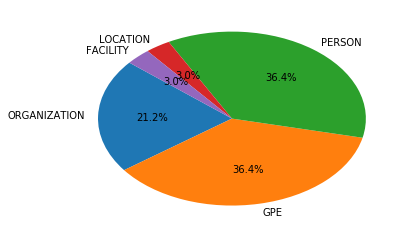

In [9]:
      
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()


<font color = green size=3><b> 3.2 Comparing NLTK with spaCy NER </font>

Using the same text you used in the first exercise of this chapter, you'll now see the results using spaCy's NER annotator. How will they compare?

The article has been pre-loaded as article. **To minimize execution times, you'll be asked to specify the keyword arguments tagger=False, parser=False, matcher=False when loading the spaCy model, because you only care about the entity in this exercise.**


**TASKS:**
- Import spacy.
- Load the 'en' model using spacy.load(). Specify the additional keyword arguments tagger=False, parser=False, matcher=False.
- Create a spacy document object by passing article into nlp().
- Using ent as your iterator variable, iterate over the entities of doc and print out the labels (ent.label_) and text (ent.text).

**HINT**
- Use the import keyword to import the module of interest.
- Pass in 'en' to spacy.load(), along with the other keyword arguments specified in the instructions.
- Use nlp(article) to create doc.
- Iterate over doc.ents, printing the .label_ and .text attributes (in that order) of ent.

In [10]:
article= '\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\r\n\r\n\r\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars. Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation. Uber deny this was the intention. The punishment for this behaviour was negligible. Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it. Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app. Too much money was at stake for that.\r\n\r\n\r\nMillions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay. Many of the users themselves are not much richer than the drivers. The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires. Silicon Valley’s culture seems hostile to humane and democratic values. The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout. This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria. Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.'

In [13]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm', tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG Uber
ORG Uber
ORG Apple
ORG Uber
ORG Uber
PERSON Travis Kalanick
ORG Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
ORG Uber
GPE drivers’
LOC Silicon Valley’s
ORG Yahoo
PERSON Marissa Mayer
MONEY $186m


<font color = green size=3><b> 3.3 French NER with polyglot I </font>

In this exercise and the next, you'll use the polyglot library to identify French entities. 

**TASKS:**
- Create a new Text object called txt.
- Iterate over txt.entities and print each entity, ent.
- Print the type() of each entity, ent.


In [18]:
article = "\ufeffédition abonné\r\n\r\n\r\nDans une tribune au « Monde », l’universitaire Charles Cuvelliez estime que le fantasme d’un remplacement de l’homme par l’algorithme et le robot repose sur un malentendu.\r\n\r\n\r\nLe Monde | 10.05.2017 à 06h44 • Mis à jour le 10.05.2017 à 09h47 | Par Charles Cuvelliez (Professeur à l’Ecole polytechnique de l'université libre de Bruxelles)\r\n\r\n\r\nTRIBUNE. L’usage morbide, par certains, de Facebook Live a amené son fondateur à annoncer précipitamment le recrutement de 3 000 modérateurs supplémentaires. Il est vrai que l’intelligence artificielle (IA) est bien en peine de reconnaître des contenus violents, surtout diffusés en direct.\r\n\r\n\r\nLe quotidien affreux de ces modérateurs, contraints de visionner des horreurs à longueur de journée, mériterait pourtant qu’on les remplace vite par des machines !\r\n\r\n\r\nL’IA ne peut pas tout, mais là où elle peut beaucoup, on la maudit, accusée de détruire nos emplois, de remplacer la convivialité humaine. Ce débat repose sur un malentendu.\r\n\r\n\r\nIl vient d’une définition de l’IA qui n’a, dans la réalité, jamais pu être mise en pratique : en 1955, elle était vue comme la création de programmes informatiques qui, quoi qu’on leur confie, le feraient un jour mieux que les humains. On pensait que toute caractéristique de l’intelligence humaine pourrait un jour être si précisément décrite qu’il suffirait d’une machine pour la simuler. Ce n’est pas vrai.\r\n\r\n\r\nAngoisses infondées\r\n\r\n\r\nComme le dit un récent Livre blanc sur la question (Pourquoi il ne faut pas avoir peur de l’Intelligence arti\xadficielle, Julien Maldonato, Deloitte, mars 2017), rien ne pourra remplacer un humain dans sa globalité.\r\n\r\n\r\nL’IA, c’est de l’apprentissage automatique doté d’un processus d’ajustement de modèles statistiques à des masses de données, explique l’auteur. Il s’agit d’un apprentissage sur des paramètres pour lesquels une vision humaine n’explique pas pourquoi ils marchent si bien dans un contexte donné.\r\n\r\n\r\nC’est aussi ce que dit le rapport de l’Office parlementaire d’évaluation des choix scientifiques et technologiques (« Pour une intelligence artificielle maîtrisée, utile et démystifiée », 29 mars 2017), pour qui ce côté « boîte noire » explique des angoisses infondées. Ethiquement, se fonder sur l’IA pour des tâches critiques sans bien comprendre le comment..."

#### NOTE: Could not get polyglot to function locally, but the code and outputs are below:

### Code:

    import polyglot

    # Create a new text object using Polyglot's Text class: txt
    txt = Text(article)

    # Print each of the entities found
    for ent in txt.entities:
        print(ent)

    # Print the type of each entity
    print(type(ent))
    
### Output:

    <script.py> output:
    ['Charles', 'Cuvelliez']
    ['Charles', 'Cuvelliez']
    ['Bruxelles']
    ['l’IA']
    ['Julien', 'Maldonato']
    ['Deloitte']
    ['Ethiquement']
    ['l’IA']
    ['.']
    <class 'polyglot.text.Chunk'>
    
    


**TASKS:**
- Use a list comprehension to create a list of tuples called entities.
- The output expression of your list comprehension should be a tuple. Remember to use () to create the tuple.
- The first element of each tuple is the entity tag, which you can access using its .tag attribute.
- The second element is the full string of the entity text, which you can access using ' '.join(ent).
- Your iterator variable should be ent, and you should iterate over all of the entities of the polyglot Text object, txt.

### Code:

    # Create the list of tuples: entities
    entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

    # Print the entities
    print(entities)
    
### Output:
    # Create the list of tuples: entities
    entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

    # Print the entities
    print(entities)



**TASKS:**
- Iterate over all of the entities of txt, using ent as your iterator variable.
- Check whether the entity contains "Márquez" or "Gabo". If it does, increment count.
- Hit 'Submit Answer' to see what percentage of entities refer to Gabriel García Márquez (aka Gabo).

### Code:

    # Initialize the count variable: count
    count = 0

    # Iterate over all the entities
    for ent in txt.entities:
        # Check whether the entity contains 'Márquez' or 'Gabo'
        if "Márquez" in ent or "Gabo" in ent:
            # Increment count
            count += 1

    # Print count
    print(count)

    # Calculate the percentage of entities that refer to "Gabo": percentage
    percentage = count * 1.0 / len(txt.entities)
    print(percentage)

    
### Output:
    <script.py> output:
        29
        0.29591836734693877

**TASKS:**
- Use a set comprehension to create a set of spacy entities, keeping only the text. The document object is available as doc. The text can be accessed using the .text attribute of each entity.
- Use the set method .intersection() to find the entities that are in both spacy_ents and poly_ents.
- Calculate the number of entities not included in the new ensemble set of entities. You can do this by calculating the length of the union of spacy_ents and poly_ents (which can be computed using the .union() method) and then subtracting the length of ensemble_ents

### Code:

    # Create a set of spaCy entities keeping only their text: spacy_ents
    spacy_ents = {e.text for e in doc.ents} 

    # Create a set of the intersection between the spacy and polyglot entities: ensemble_ents
    ensemble_ents = spacy_ents.intersection(poly_ents)

    # Print the common entities
    print(ensemble_ents)

    # Calculate the number of entities not included in the new ensemble set of entities: num_left_out
    num_left_out = len(spacy_ents.union(poly_ents)) - len(ensemble_ents)
    print(num_left_out)

    
### Output:
    <script.py> output:
        {'Fink', 'Darwin', 'Lombroso', 'Thomas Clarkson', '”', 'Jason Friedenfelds', 'Chuck Close', 'Tobias Weyand', 'Ilya Kostrikov', 'Georg Christoph Lichtenberg', 'Ilya Sutskever', 'Charina Choi', 'Josiah Nott', 'England', 'William Shakespeare', 'Caucasian', 'Samuel Morton', 'Swiss', 'CNN', 'Temple University', 'Manning', 'Israeli', 'Plato', 'Ernst Haeckel', 'Naples', 'Tal Hassner', 'George Gliddon', 'Howard', 'James Weidmann', '“', 'Nixon', 'Stephen Jay Gould', 'Zhang', 'Italy', 'Liaoning', 'Zhang’s', 'Geoffrey Hinton', 'China', 'Isaac Newton', 'Francis Galton', 'Byron', 'Marco Polo', 'Gil Levi', 'Guangdong', 'Gliddon', 'Mike Burton', 'Giuseppe Villella', 'Clarkson', 'California', 'Australia', 'Atlanta', 'Wu', 'Alex Krizhevsky', 'Pieter Camper', 'Papuans', 'Jiangsu', 'Nazi', 'Cesare Lombroso', 'Brian Holtz', 'Kathryn Hume', 'Alison Lentz', 'Stockholm', 'John Howard', 'Pavia', 'Roberts', 'Google'}
        250
